# Anatomy of a PyGMT figure

This tutorial will cover the fundamental concepts behind making figures with PyGMT: importing the package, creating a blank figure, drawing coastlines, drawing a map frame, choosing a projection, and adding some data to the map.

Let's get started!

## Importing 

First thing to do is load PyGMT (`import`) so that we can access its functionality. PyGMT has a flat package layout, meaning that you can access everything in it with a single `import`.

In [1]:
import pygmt

:::{tip}
In Jupyter, you can find out what PyGMT has to offer by typing into a code cell `pygmt.` and hitting the TAB key. This will give you a menu of all our functions.
:::

## Creating a figure

All plotting is handled by the `pygmt.Figure` class. Here is a good analogy for it:

> `pygmt.Figure` is a blank canvas onto which you can lay down plot elements in order.

Here is how you can create a figure:

In [2]:
fig = pygmt.Figure()

Now that we have a blank canvas in the `fig` variable, we can start laying down plot elements that we want to show. We'll start by putting down some coast lines around Japan.

## Drawing coastlines

Before we can actually include anything in our figure, we need to specify the geographic bounding box that contains the data/features we want to plot. This bounding box is referenced throughout PyGMT as the **region** of a figure and it has the format of a list containing the **West, East, South, and North** (WESN) coordinates of the bounding box.

In [3]:
region = [130, 145, 30, 45]

Now that our region is defined, we can lay down the coastlines for this region using the `coast` method of `pygmt.Figure`.

In [4]:
fig.coast(region=region, shorelines=True)

And to see what the figure looks like, we call the `show` method of `pygmt.Figure`.

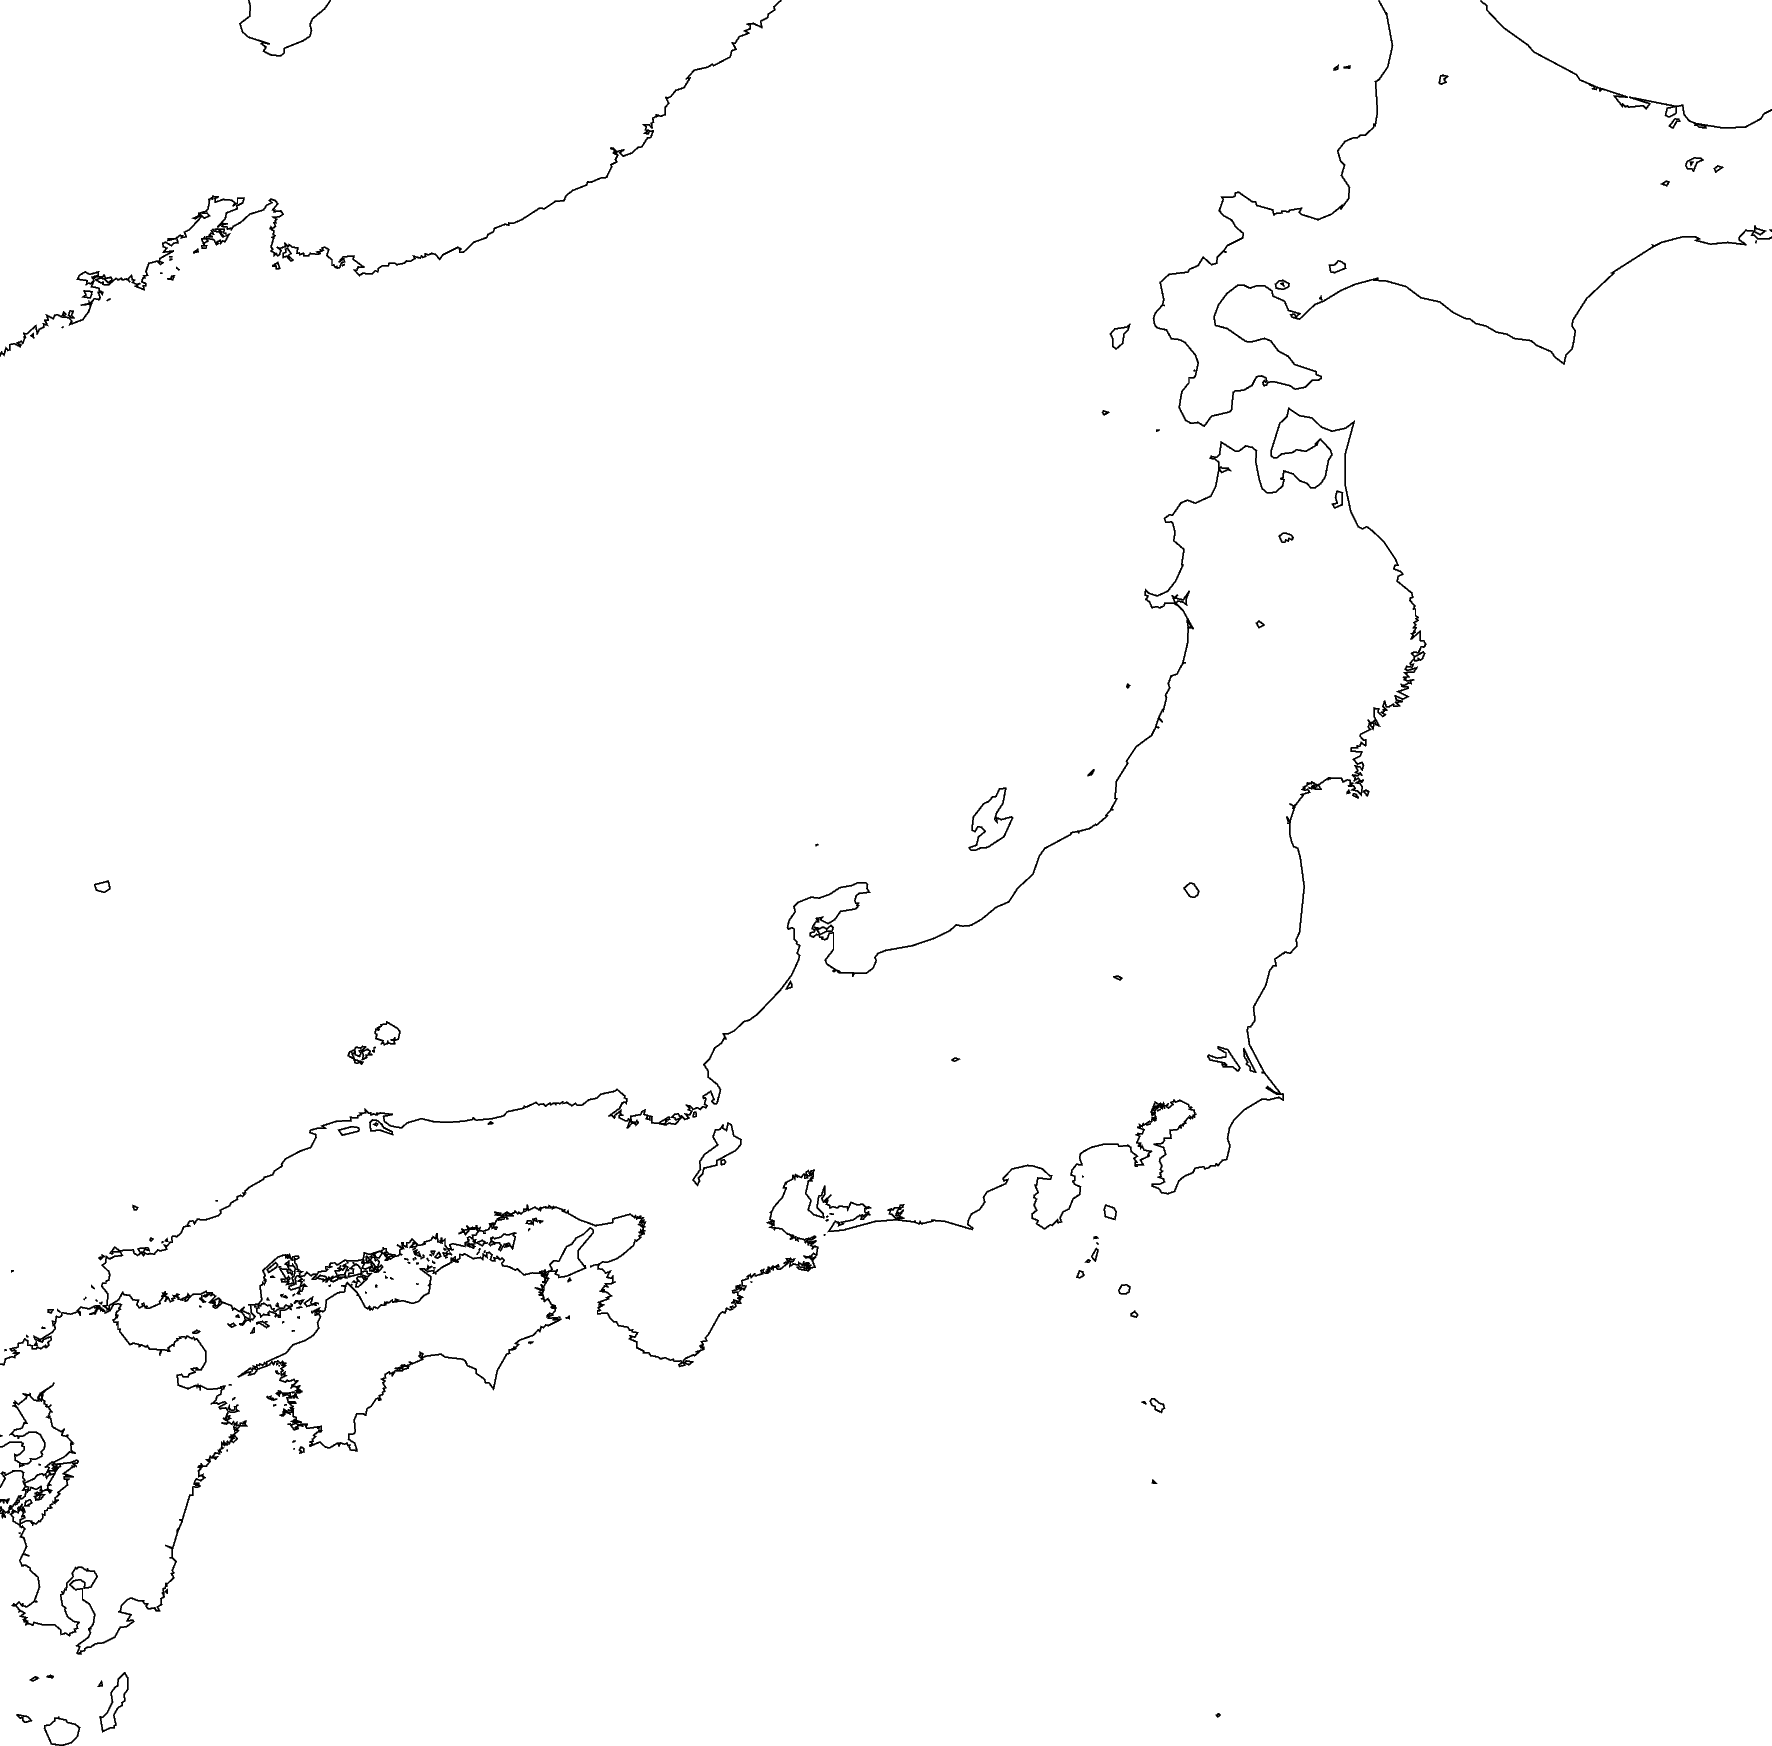

In [5]:
fig.show()

:::{seealso}
On Jupyter, `show` will embed a PNG of the figure directly into the notebook. But it can also open a PDF in an external viewer, which is probably what you want if you're using a plain Python script. See the documentation for [`pygmt.Figure.show`](https://www.pygmt.org/v0.6.1/api/generated/pygmt.Figure.show.html#pygmt.Figure.show) for more information.
:::

Beyond the outlines, we can also color the land and water regions to make them stand out. Lets start with the water.

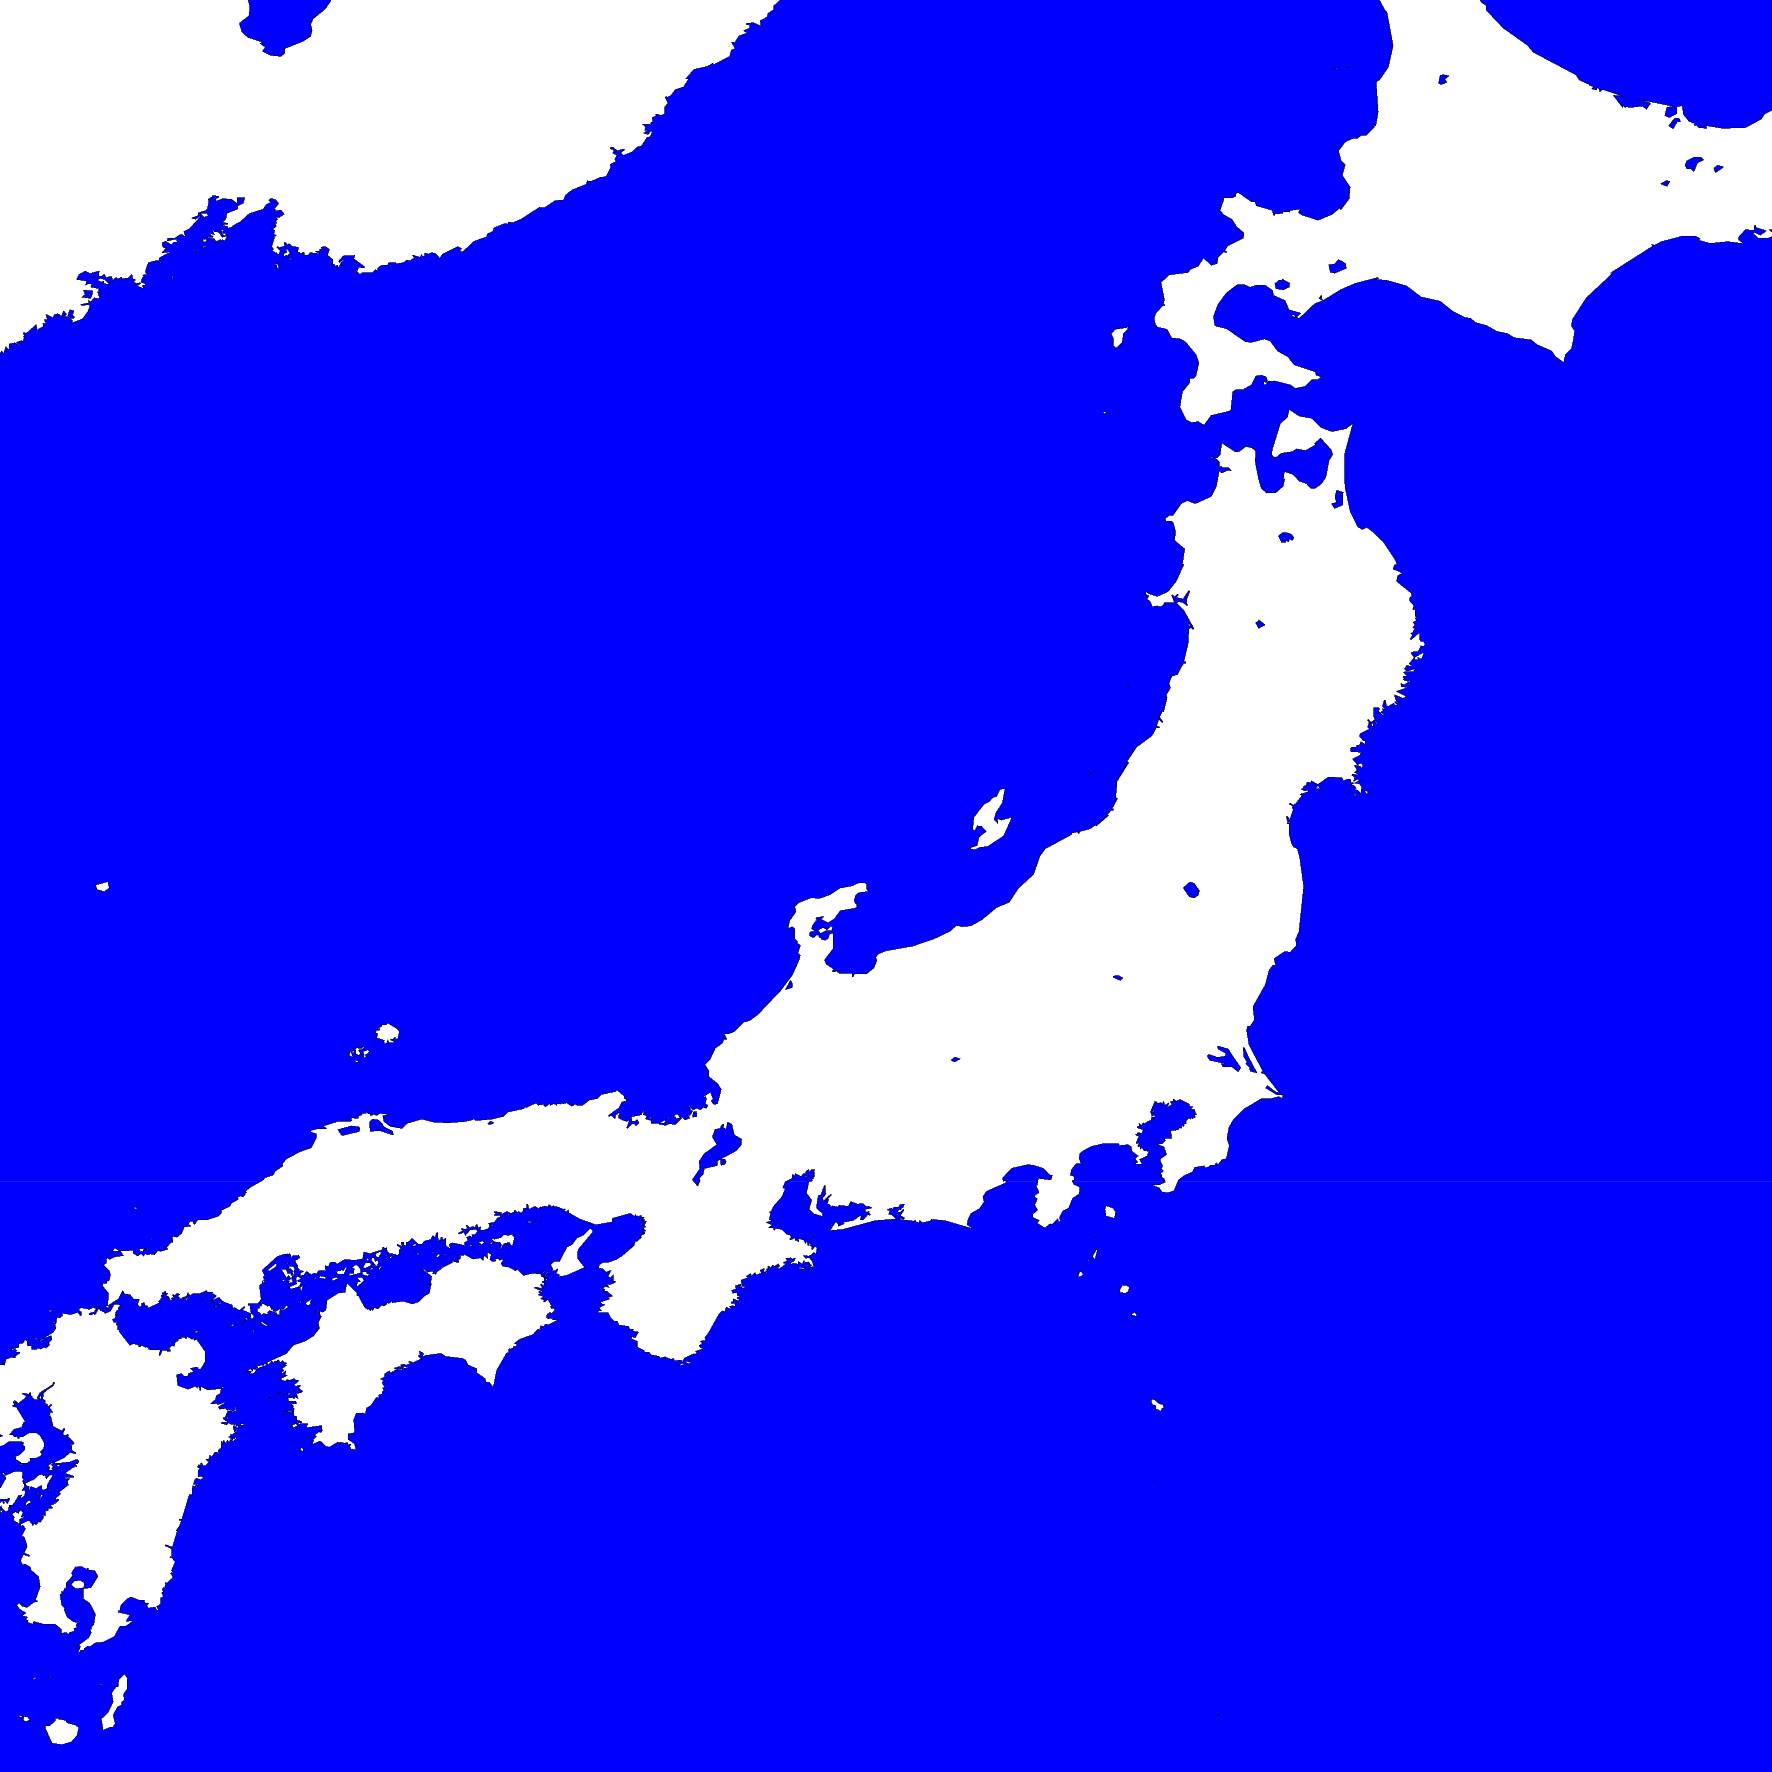

In [6]:
fig.coast(water="blue")
fig.show()

And now add the land in a light green color.

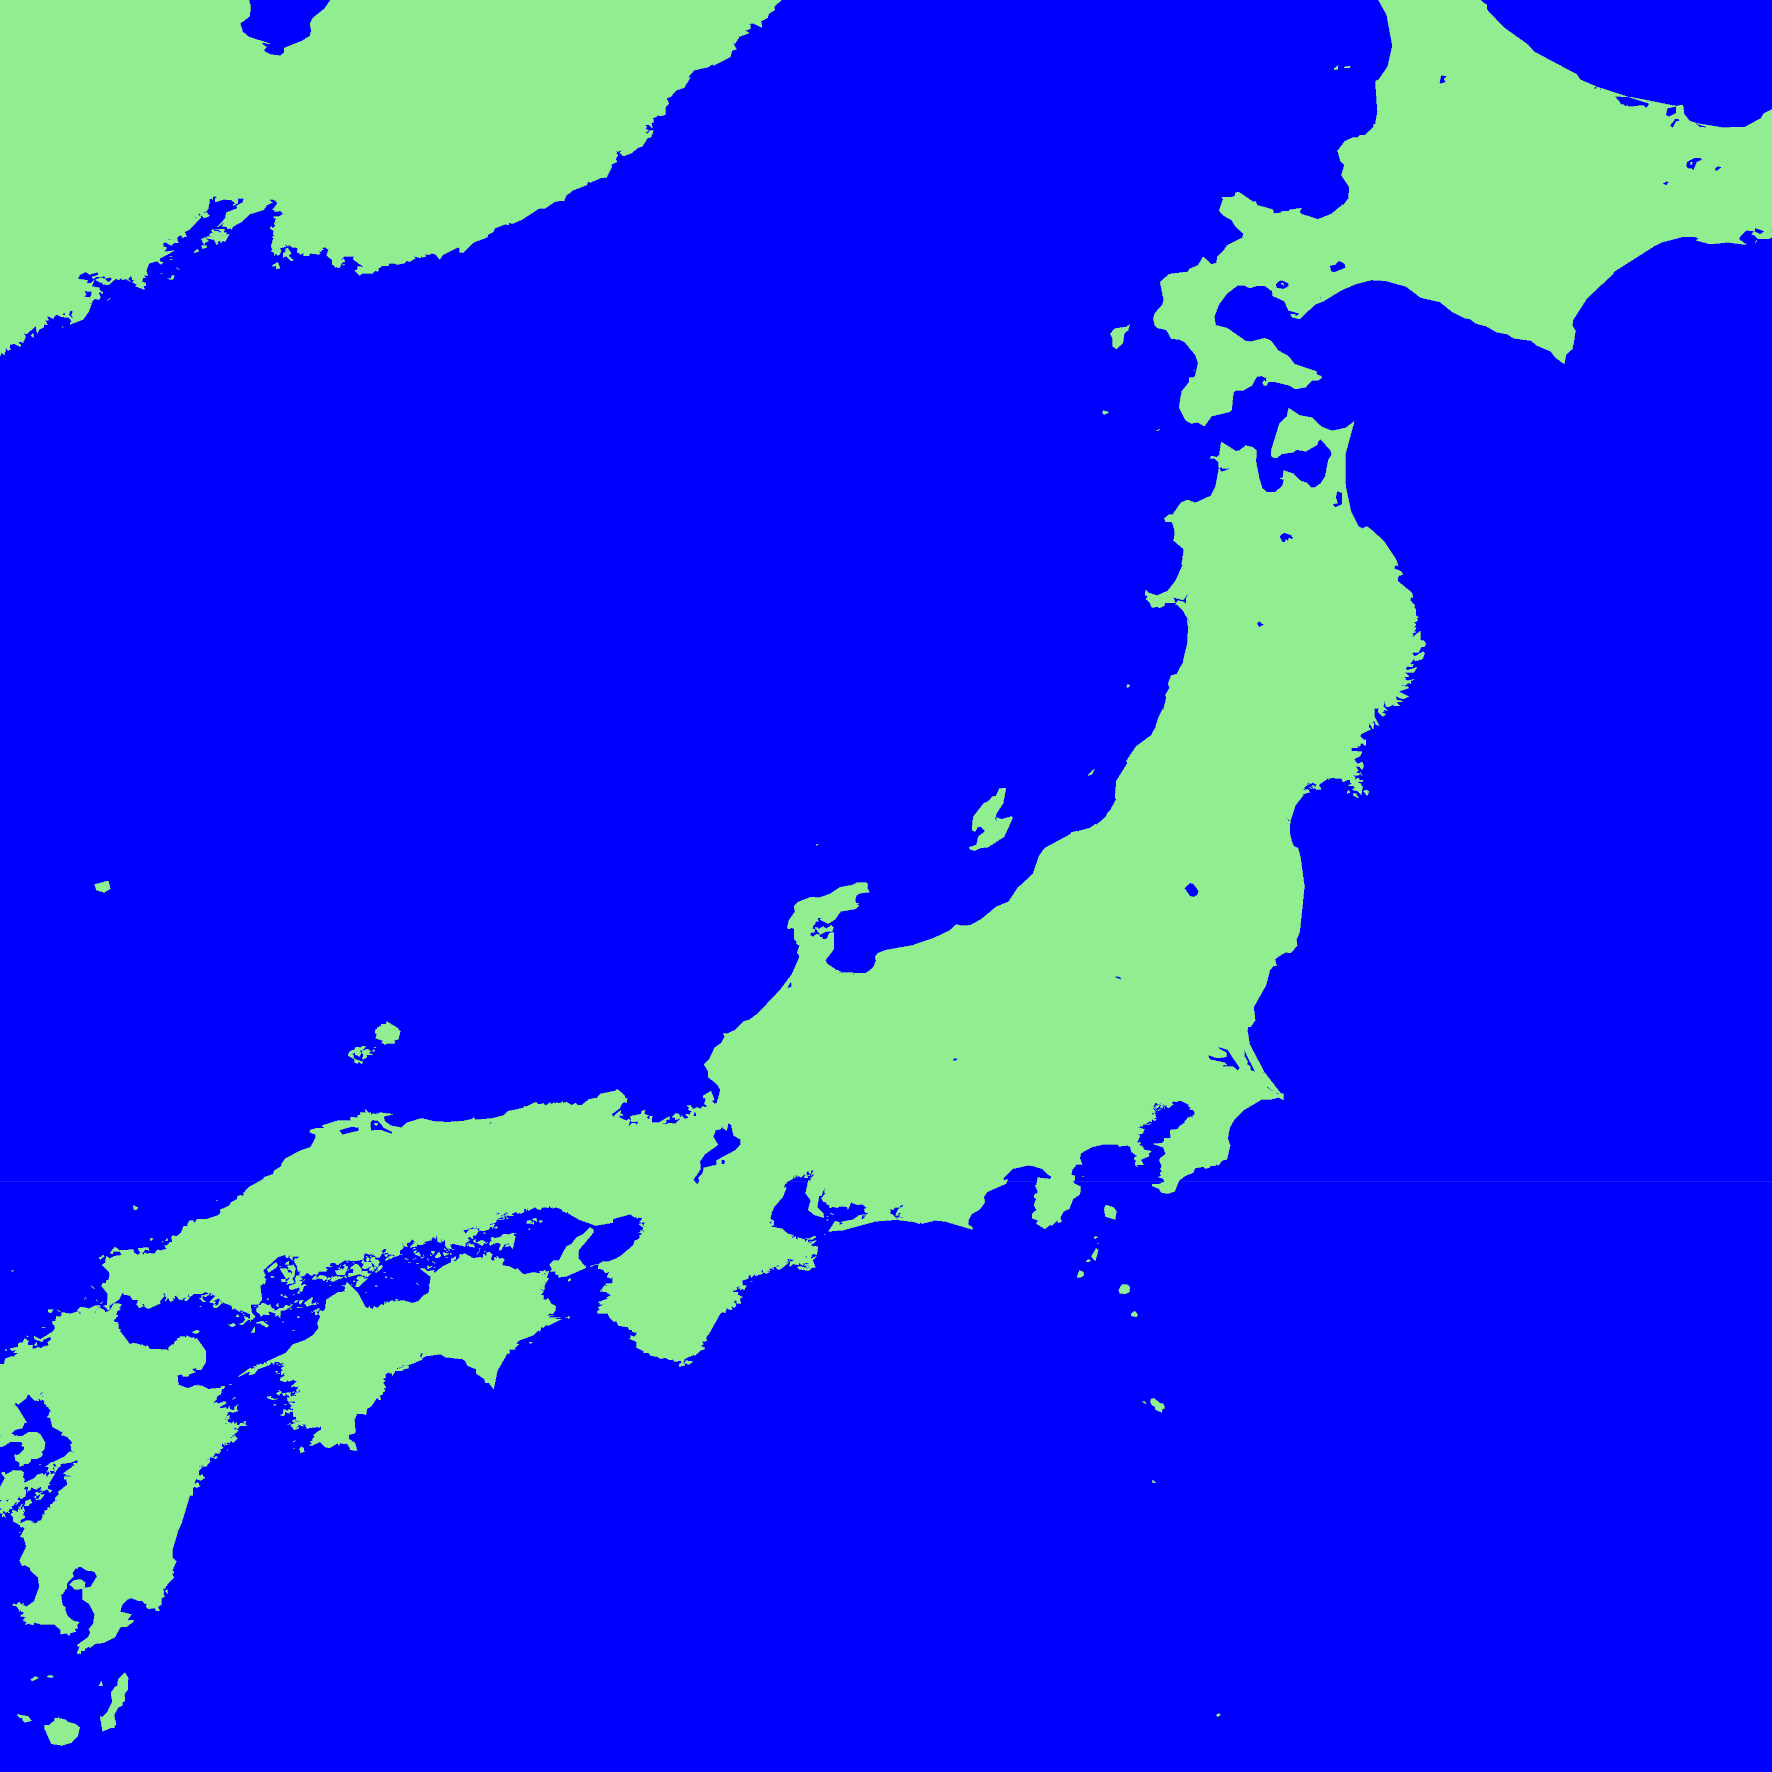

In [7]:
fig.coast(land="lightgreen")
fig.show()

A things to note here:

1. We added the colored land and water on top of what was already on our canvas (the shorelines), which means that they are still there but we don't see them because they are below the solid colors.
1. We didn't need to provide a `region` this time around because PyGMT remembers the last region that was provided. But you could provide one if you want to use a different value.

If we want to have a figure with the shorelines laid out on top of the solid colors, we can make a new figure and add them in the correct order or as part of the same call to `coast`.

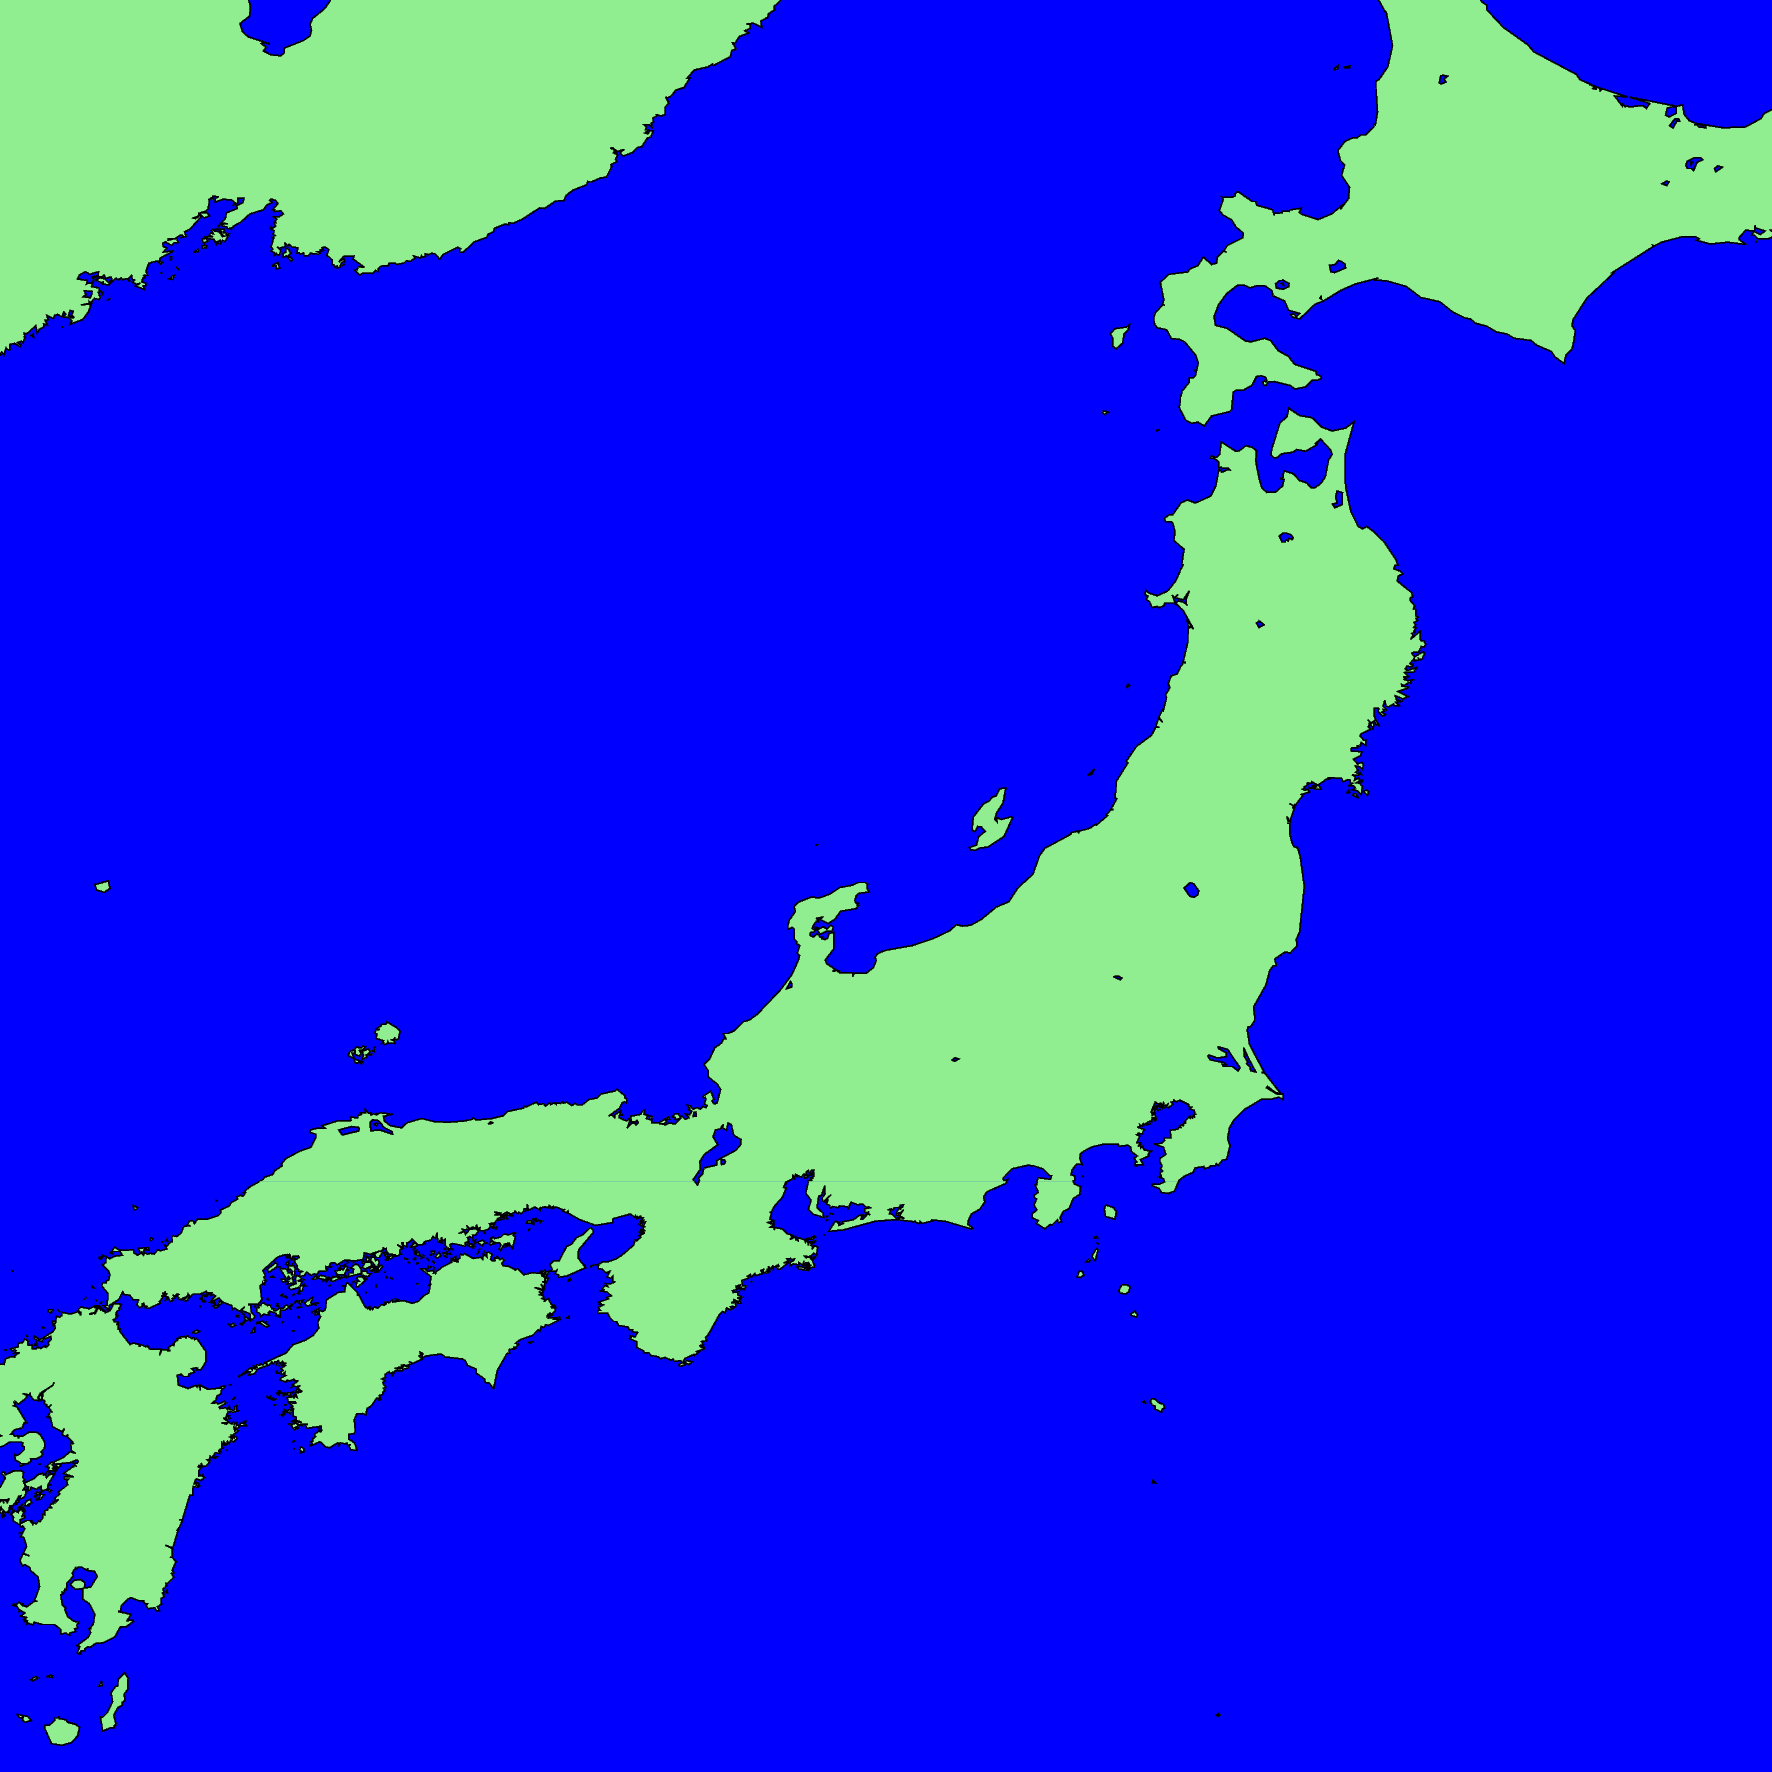

In [20]:
fig = pygmt.Figure()
fig.coast(region=region, shorelines=True, land="lightgreen", water="blue")
fig.show()

Alright, now we have a lovely figure with colored land and water plus some shorelines. But what are the coordinates associated with this map? Lets add a map frame to find out.

## Drawing a map frame

Adding a nice frame with coordinates, ticks, and labels is one of the jobs of the `basemap` method of `pygmt.Figure`. Here, we'll use it to add automatic annotations (`"a"`) around the figure we just made above. It will be the last item we lay on our figure canvas to guarantee that it sits above any other plot elements.

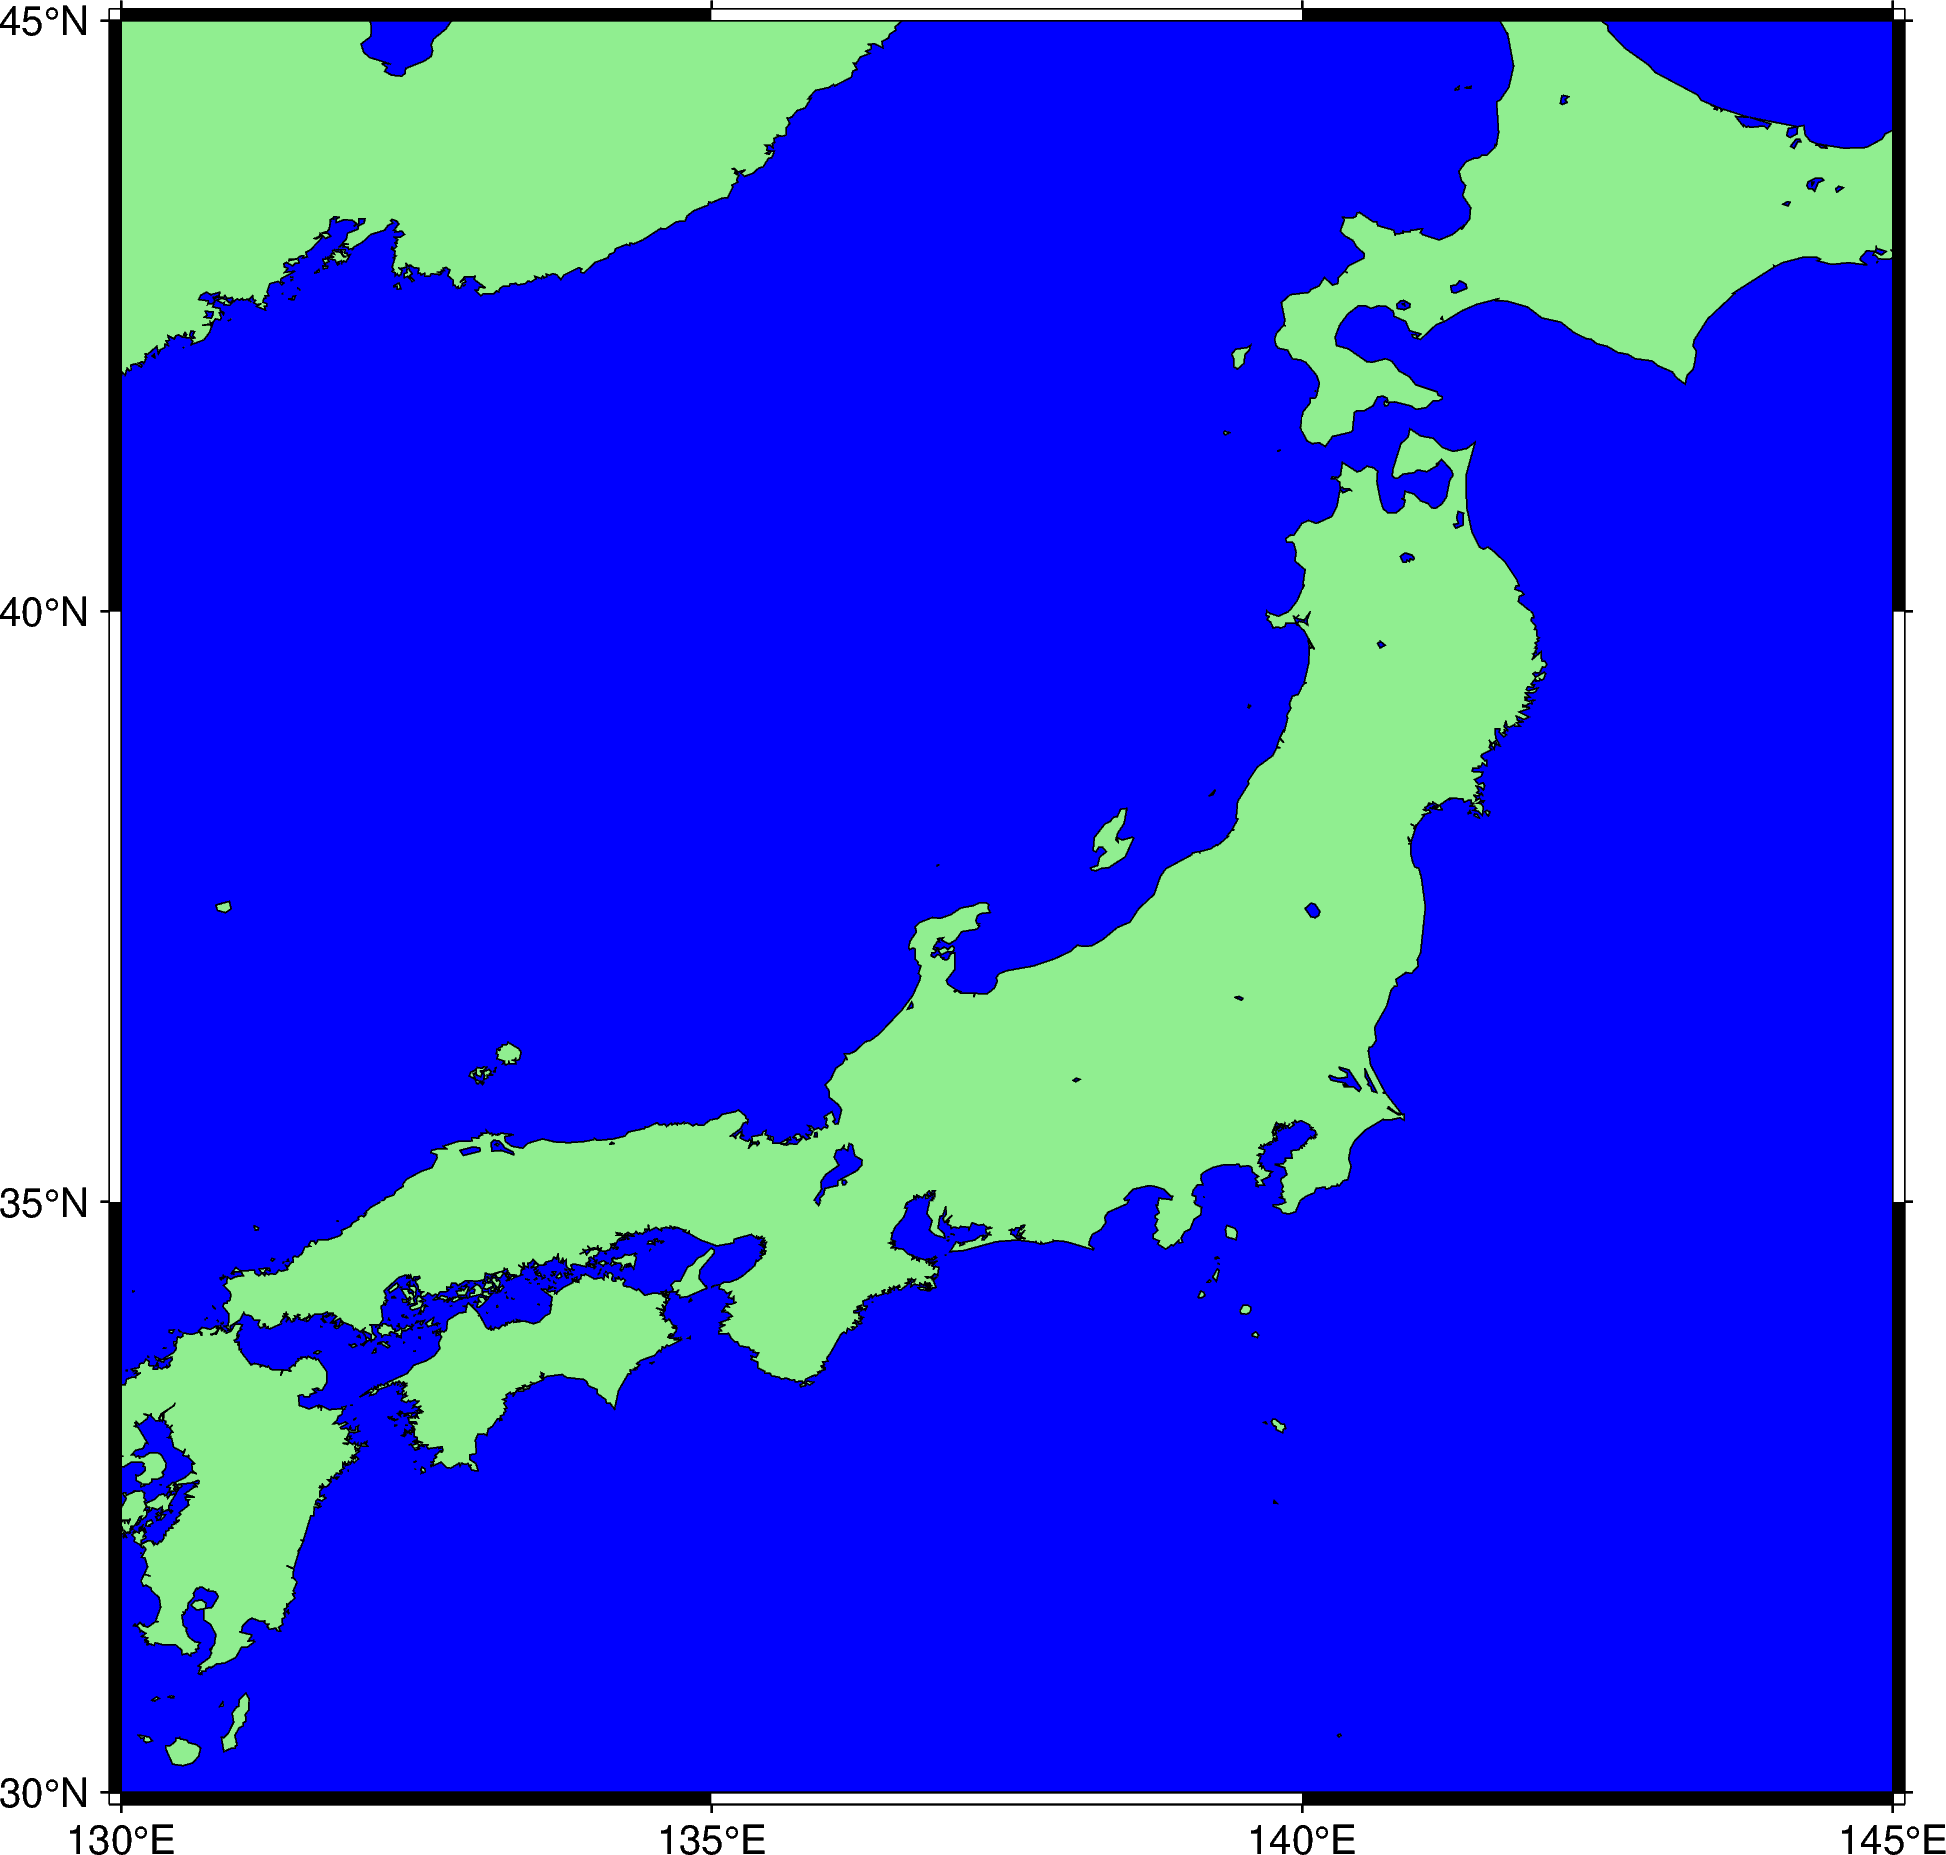

In [21]:
fig = pygmt.Figure()
fig.coast(region=region, shorelines=True, land="lightgreen", water="blue")
fig.basemap(frame="a")
fig.show()

Notice that the coordinates are automatically recognized as longitude and latitude and the tick spacing is chosen sensibly as well. 

There are many different ways in which we can customize the frame, from the ticks to the interval to the labels. Here we'll only cover a few of the most common things you'd want to do. Starting with...

### Adding minor ticks

The ticks with annotations are known as "major ticks" (controlled by the `"a"`) value. You can also add automatic "minor ticks" which have a smaller interval and won't have annotations by adding `"f"` to the `frame` argument.

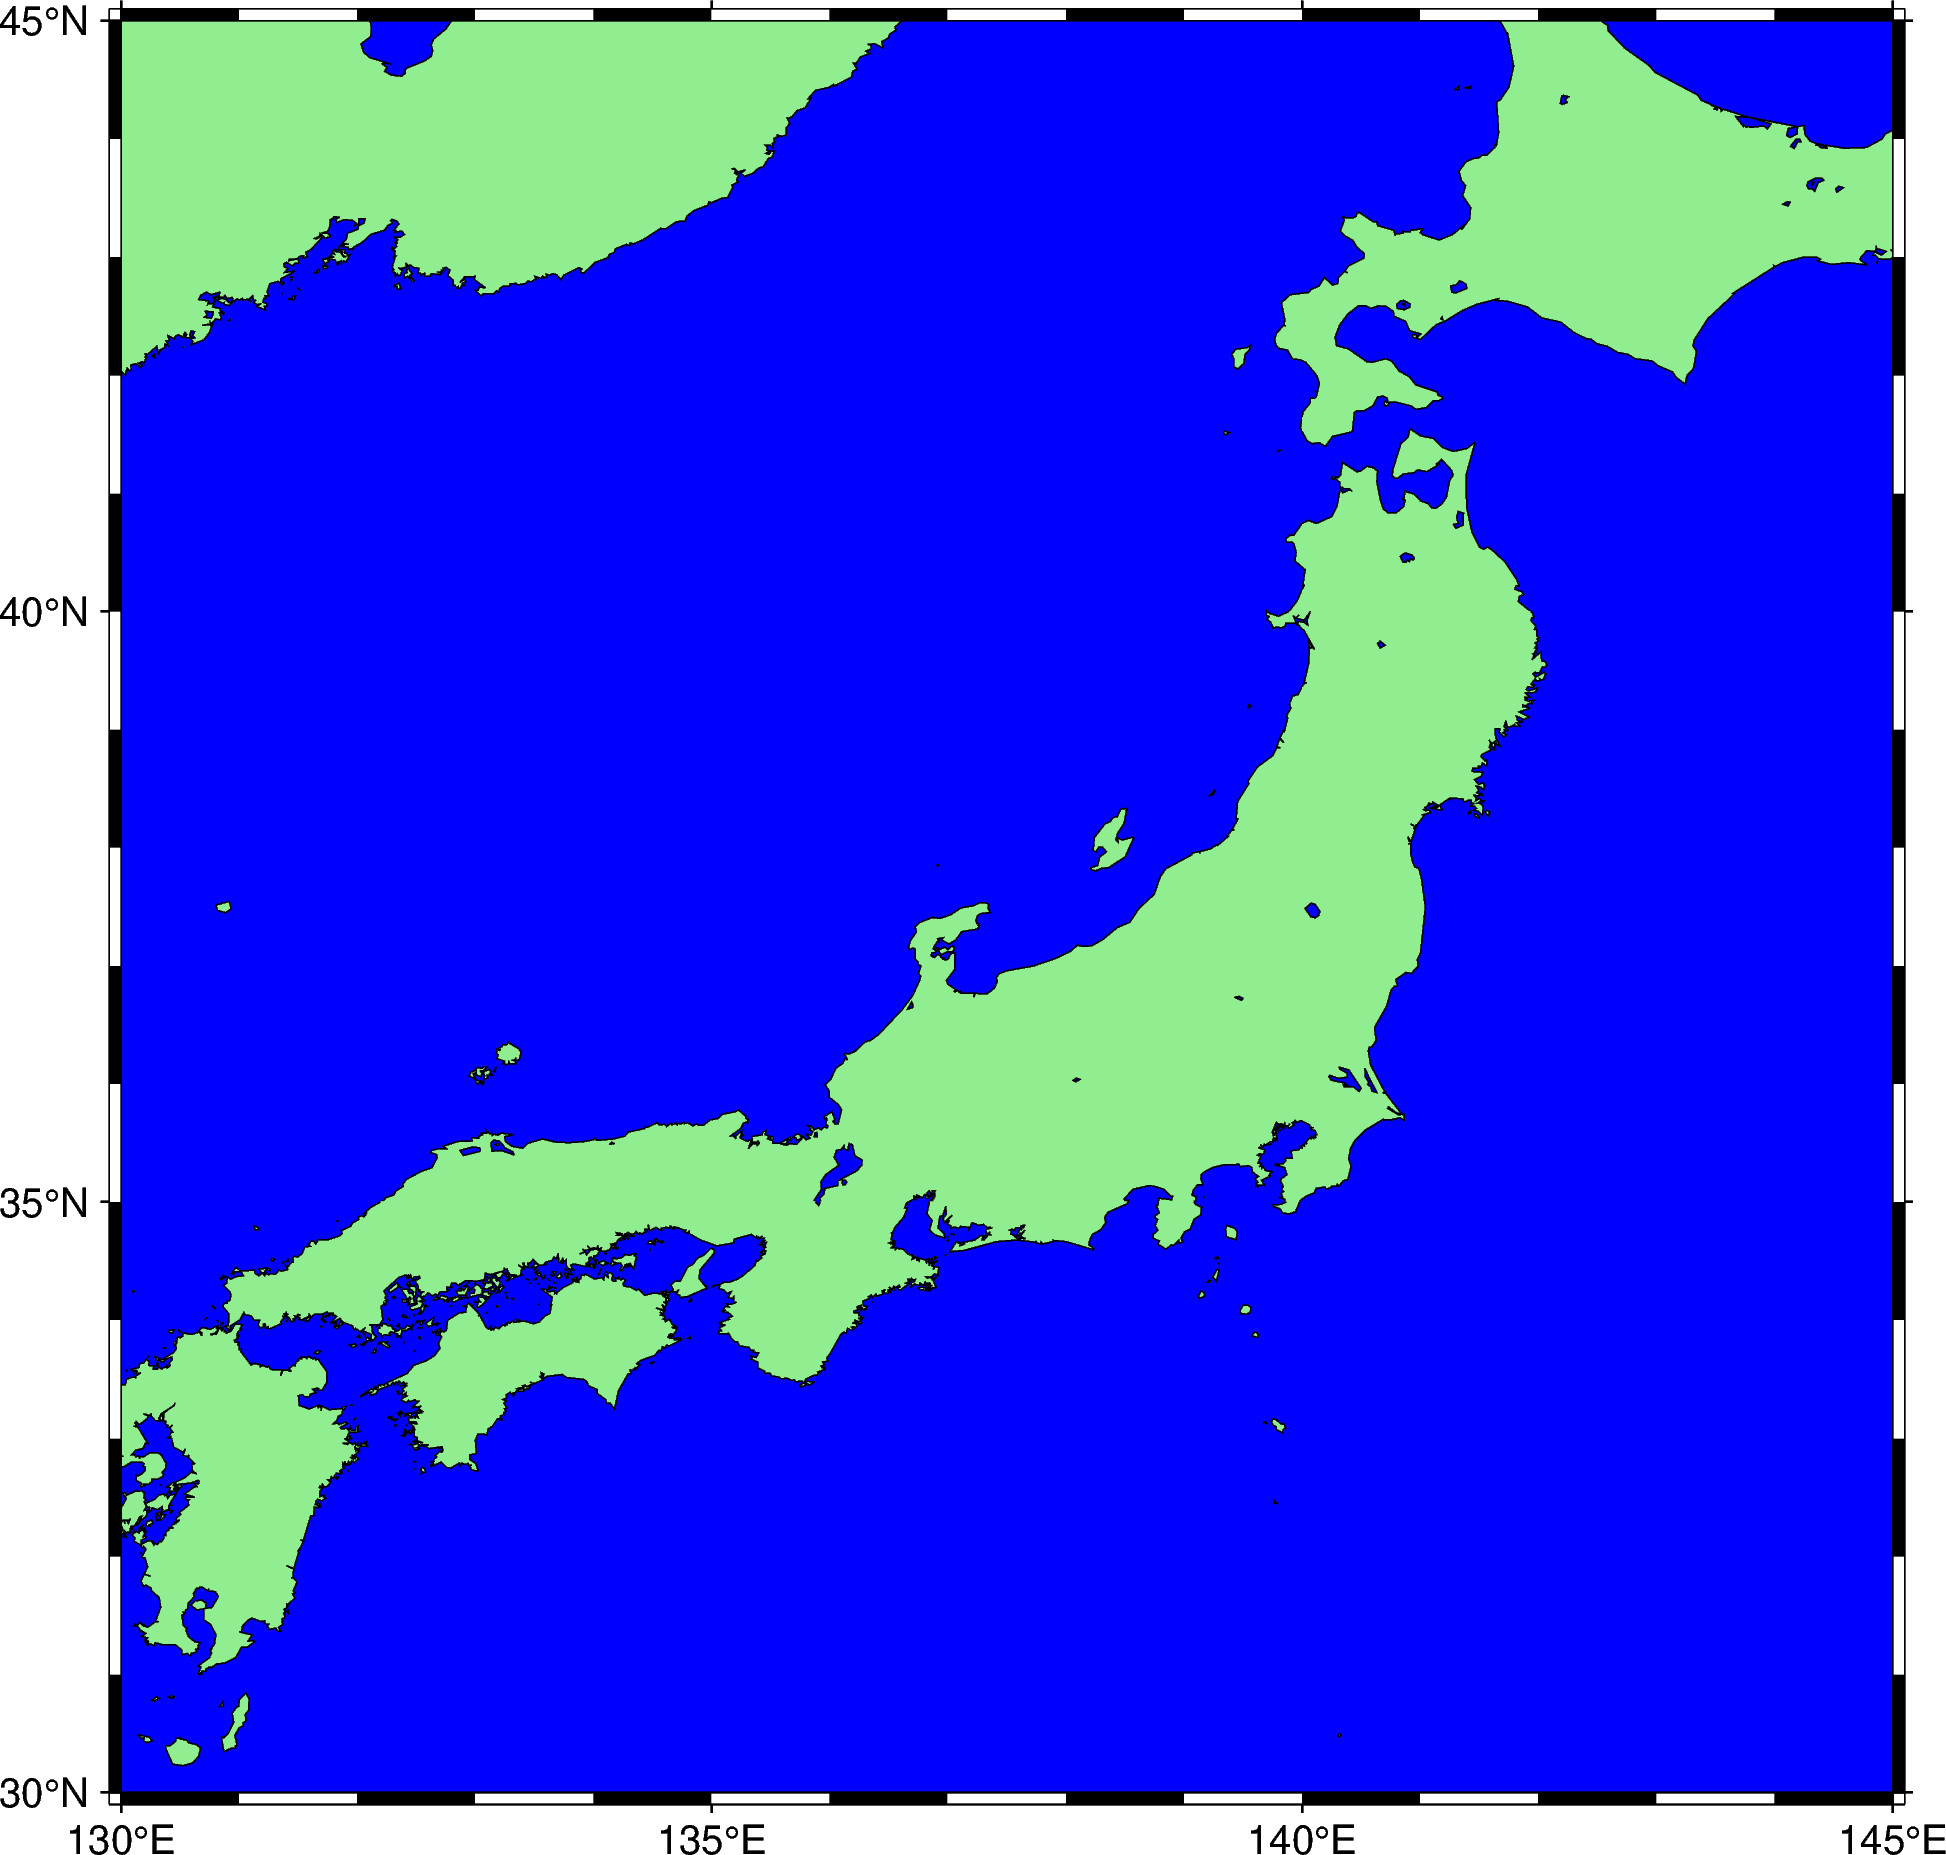

In [22]:
fig = pygmt.Figure()
fig.coast(region=region, shorelines=True, land="lightgreen", water="blue")
fig.basemap(frame="af")
fig.show()

The frame is now set to have both annotations and minor ticks, both of which are optional (so `frame="f"` would mean only having minor un-annotated ticks). Try it out!

### Adding grid lines

Grid lines are enabled by adding `"g"` to `frame`, just like we did for minor ticks. Again you can mix and match the three arguments `"a"`, `"f"`, and `"g"`.

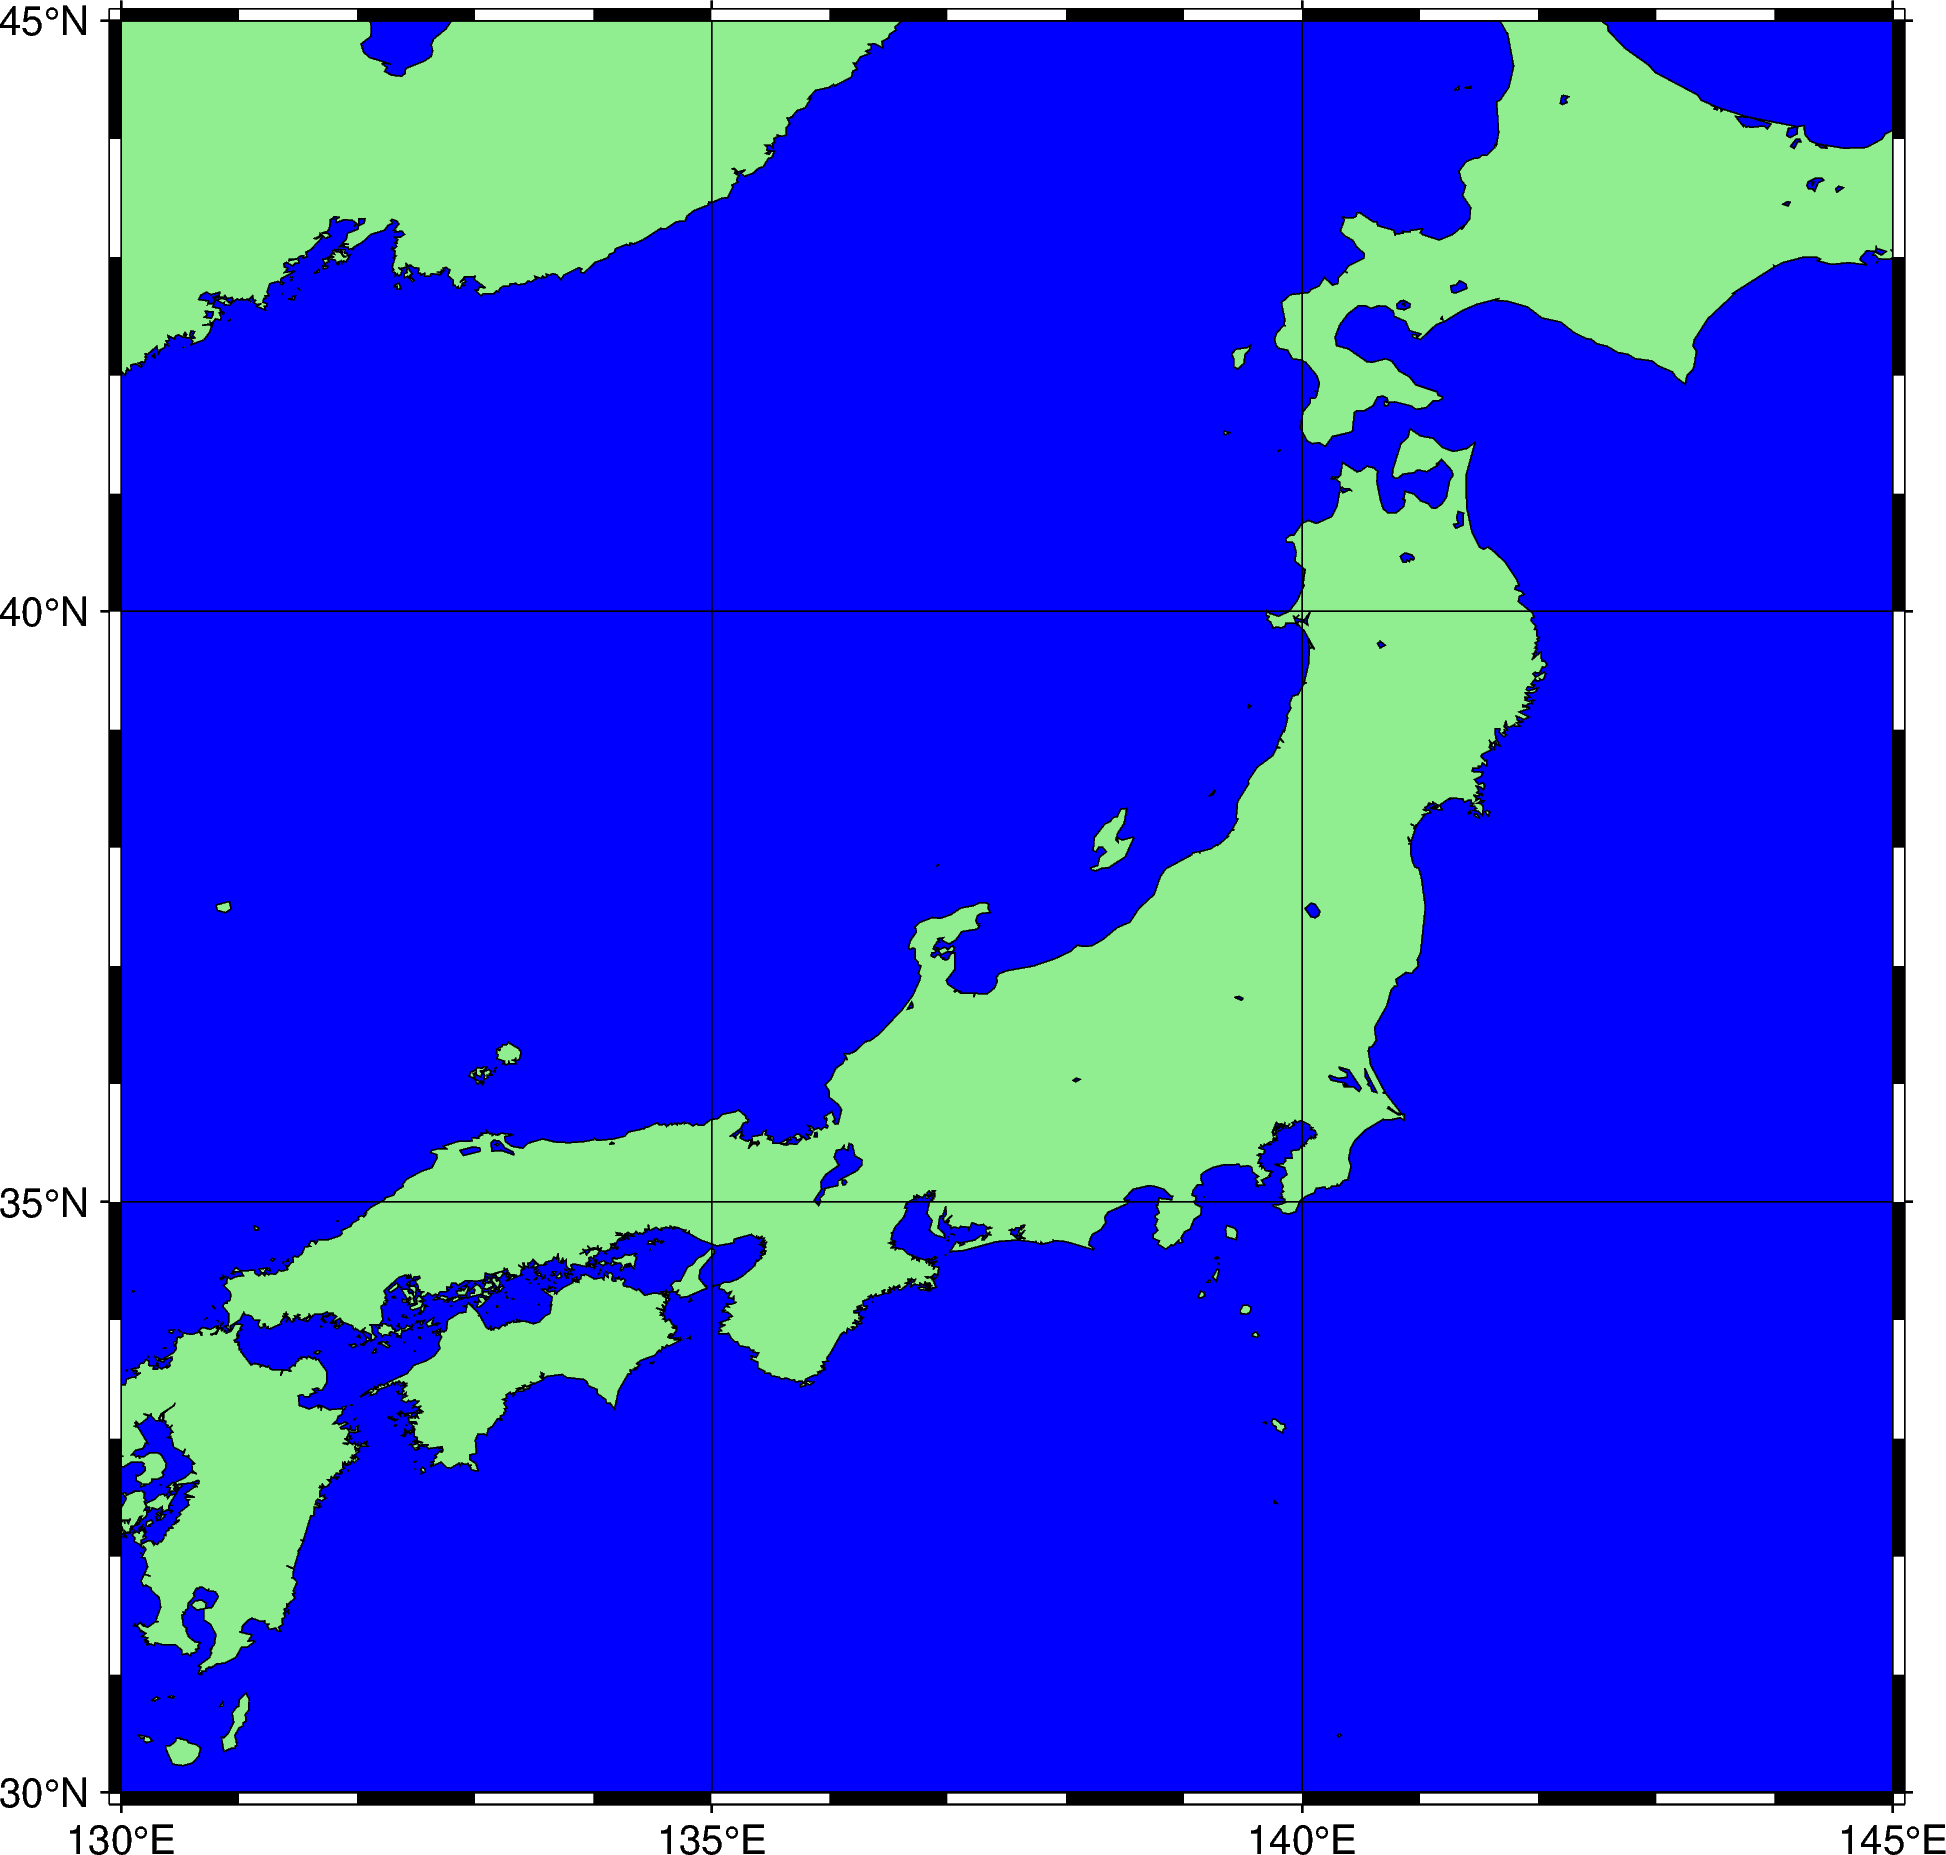

In [23]:
fig = pygmt.Figure()
fig.coast(region=region, shorelines=True, land="lightgreen", water="blue")
fig.basemap(frame="afg")
fig.show()

By default the spacing of the grid lines is the same as the annotated major ticks.

:::{note}
Adding a frame with grid lines before you plot the colored land and water or an image will hide the grid lines beneath the subsequent plot. Make sure you put the call to `basemap` last to avoid this.
:::

### Adding a title

To add a title to the figure, we need to pass in more than one argument to `frame`. We can do this by passing it a list instead of a single string. The extra argument for adding a title is a string with the format `"+tMy title goes here"`.

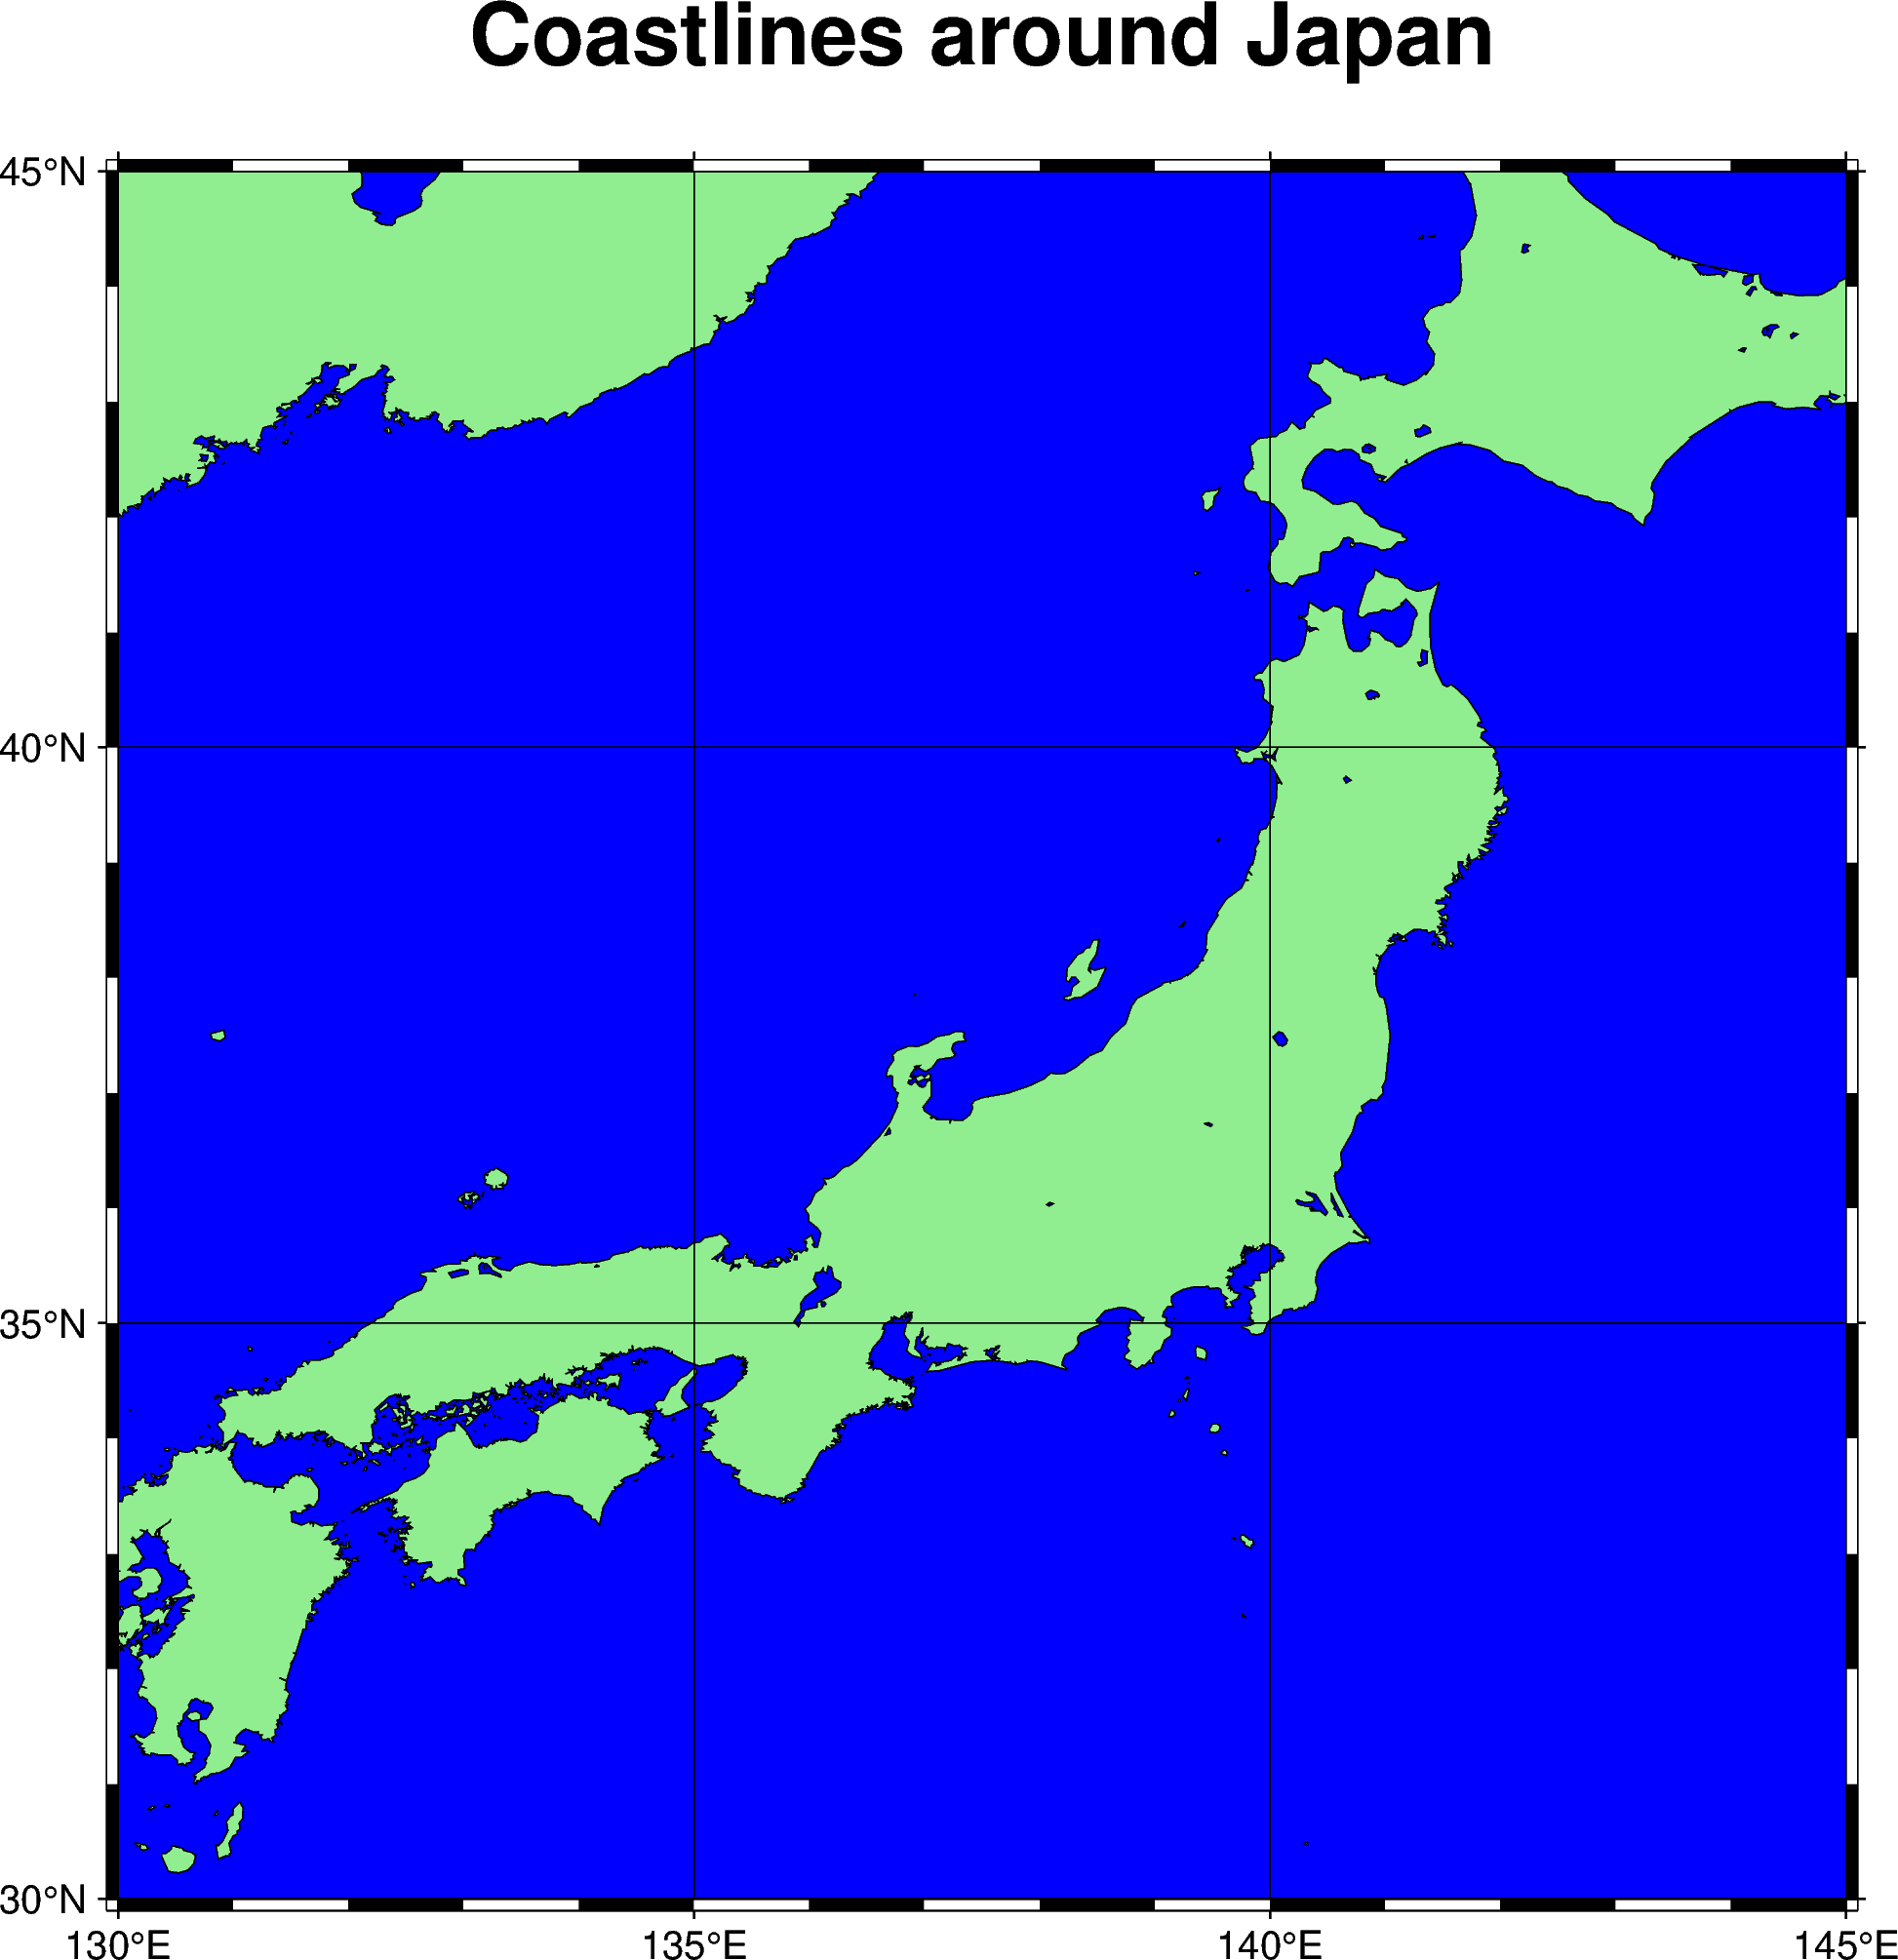

In [27]:
fig = pygmt.Figure()
fig.coast(region=region, shorelines=True, land="lightgreen", water="blue")
fig.basemap(frame=["afg", "+tCoastlines around Japan"])
fig.show()

## Choosing a projection

By default, PyGMT will use a Mercator projection if the region seems to be geographic longitude and latitude. Many other projections are also supported, which may often be better suited for your plots (particularly around the polar regions or for larger global maps).

For our case, let's go with a [Cassini projection](https://www.pygmt.org/v0.6.1/projections/cyl/cyl_cassini.html#sphx-glr-projections-cyl-cyl-cassini-py). To specify this, we need to pass the `projection` argument to the first plot method we call. The projection specification is a string starting with a 1-letter code for the projection followed by the projection arguments (particular to each projection) and finishing off with the physical width of the figure (in centimeters or inches, usually). For the Cassini projection, this is what it would look like: `projection="C137.5/37.5/15c"` in which `C` is for Cassini projection, `137.5` is the central longitude of the projection set to the center of our region, `37.5` is the same for the central latitude, and `15c` means the plot will be 15 centimeters wide on the page (this influences the relative size of fonts and tick labels). 

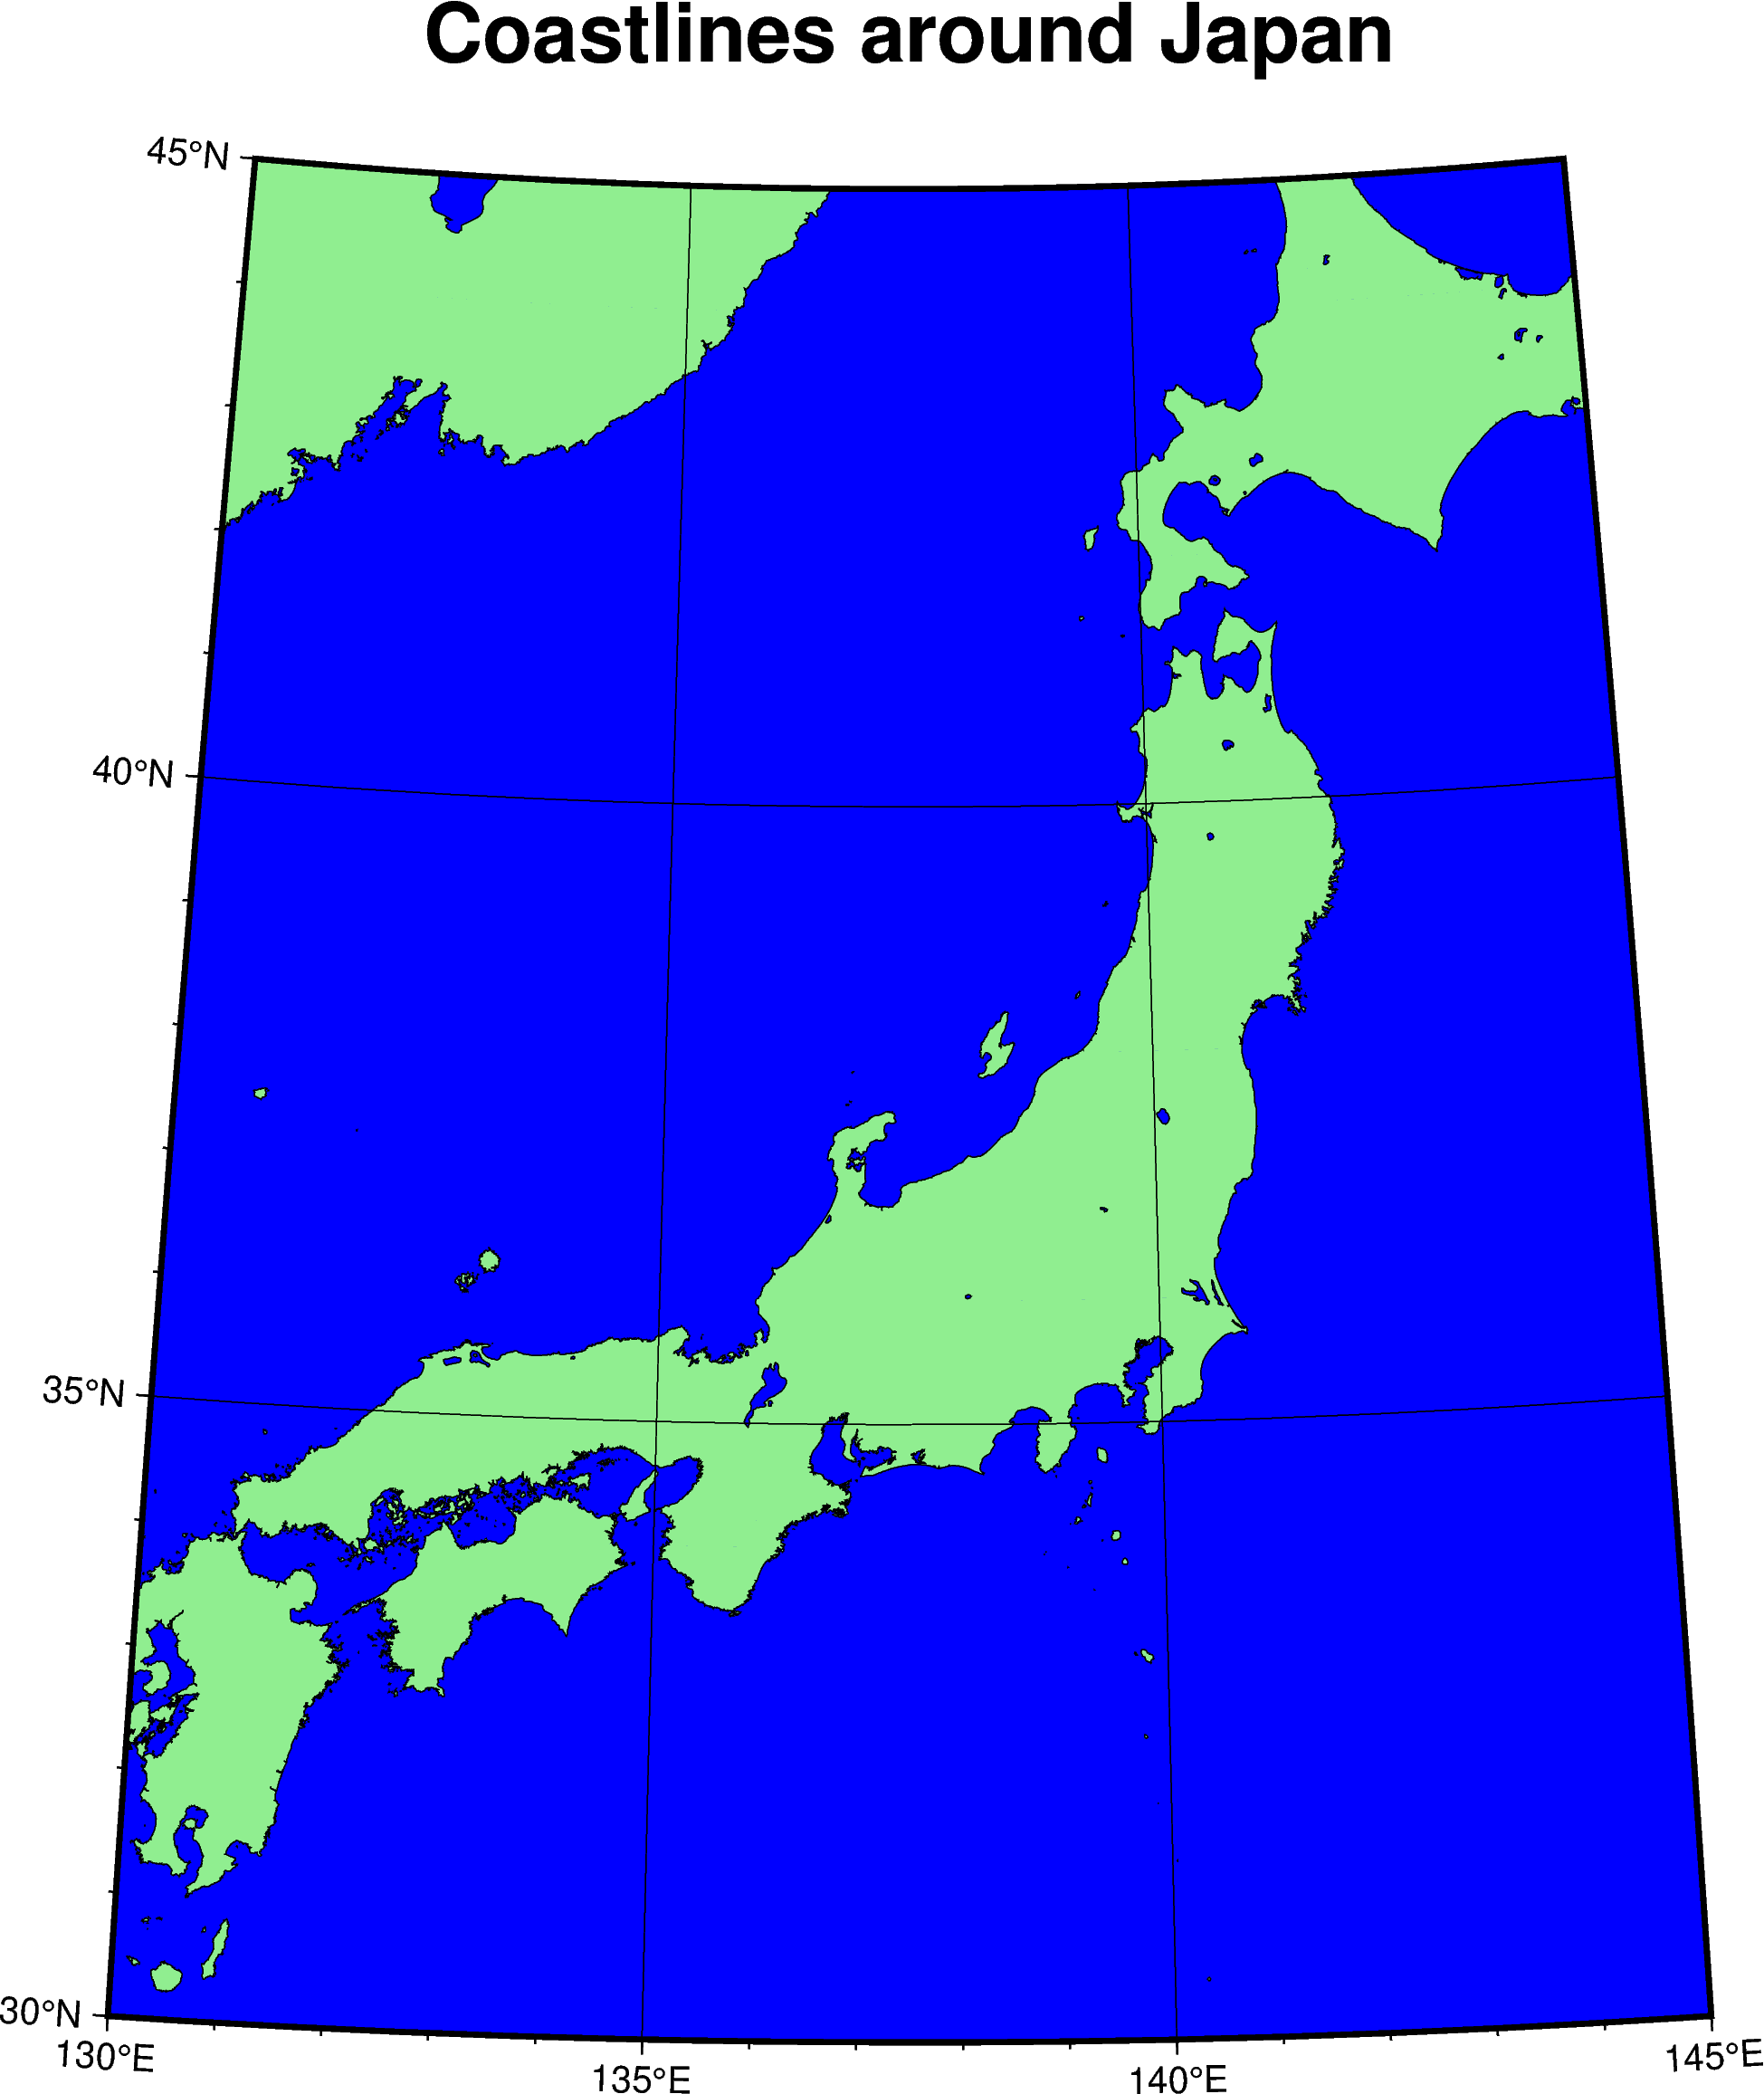

In [28]:
fig = pygmt.Figure()
fig.coast(
    projection="C137.5/37.5/15c", 
    region=region, 
    land="lightgreen", 
    water="blue",
    shorelines=True,
)
fig.basemap(frame=["afg", "+tCoastlines around Japan"])
fig.show()

:::{seealso}
The [Projections Gallery](https://www.pygmt.org/v0.6.1/projections/index.html) has examples of each projection along with a description of their parameters, properties, and use cases.
:::

## Adding some data to the map